## Focused Analysis of Goal Management Categories (Flag 35)

### Dataset Overview
This dataset comprises 500 simulated records from the ServiceNow `sn_gf_goal` table, detailing various aspects related to organizational goals. Key attributes include goal status, assigned owner, department affiliation, start and end dates, and comprehensive descriptions. The dataset also features metrics like priority level, percentage completed, and target achievement percentage. It primarily focuses on tracking and managing both departmental and individual goals, providing insights into the effectiveness of these goals and their alignment with overarching organizational strategies. Additionally, the dataset logs updates for each goal, offering a historical view of changes and the identities of those making these updates.

### Your Objective
**Objective**: Investigate the unexpectedly high success rates of Low and Medium priority 'Cost Optimization' goals, and utilize these findings to enhance goal management efficiency across all goal categories.

**Role**: Operational Effectiveness Analyst

**Challenge Level**: 2 out of 5. This task requires adept data manipulation and interpretation skills to uncover underlying patterns and develop actionable strategies, making it a challenging yet rewarding analysis.

**Category**: Goal Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [36]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset used for the analysis. The goal dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [37]:
dataset_path = "csvs/flag-35.csv"
goal_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
goal_data.head()


,goal_id,state,owner,department,start_date,end_date,description,priority,percent_complete,target_percentage,category,goal_met
0,83be5a75-1c83-4b30-88d8-dfb57731a568,Closed,Courtney Bray,Finance,2024-07-30,2024-09-04,This goal involves collaborate efforts across ...,High,59.53,87.84,Efficiency,False
1,297db06d-98b8-4674-918e-241f613d04d3,Open,Joshua Jennings,Finance,2024-07-09,2024-10-02,This goal involves joint efforts across multip...,Medium,67.33,84.03,Customer Satisfaction,False
2,5e48505b-915f-4636-a809-1f9f31020227,In Progress,Steven Harmon,Finance,2024-08-05,2024-10-14,This goal involves integration efforts across ...,High,92.36,77.60,Employee Satisfaction,True
3,d10b55a8-47d5-4254-bdac-cf9eaa7c1d59,In Progress,Jo Wise,Finance,2023-11-09,2024-04-04,Method draw present a worry meet training coach.,Critical,91.04,75.86,Revenue Growth,True
4,a0683223-18f2-4602-aa06-f036edf7a1db,In Progress,Mike Johnson,IT,2024-08-30,2024-11-17,This goal involves integration efforts across ...,Critical,76.06,77.11,Cost Reduction,False


### **Question 1: How does the success rate of goals met across different categories compare?**

#### Plot percentage of target goals achieved by category

This plot visualizes the percentage of target goals achieved across different categories or topics, providing  insight into the success rate of goal management. This helps in identifying which kind of goals are succeeding at meeting and which areas or categories improvements might be necessary.

/tmp/ipykernel_27736/839738633.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Category', y='Percentage of Goals Met', data=department_goal_achievement, palette='viridis')


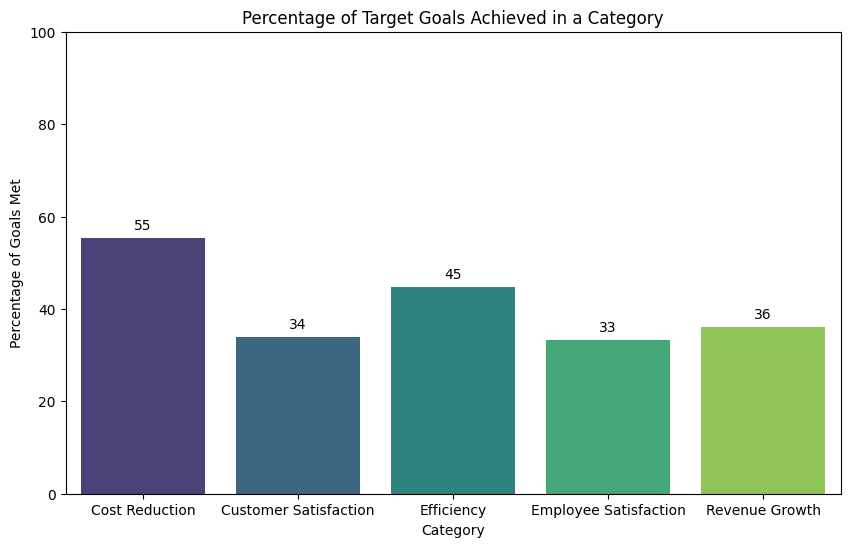

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'goal_data' is the DataFrame created from the previous code

# Calculate if each goal met its target percentage
goal_data['goal_met'] = goal_data.apply(lambda row: row['percent_complete'] >= row['target_percentage'], axis=1)

# Group by department and calculate the percentage of goals met
department_goal_achievement = goal_data.groupby('category')['goal_met'].mean() * 100

# Reset index to turn the series into a DataFrame
department_goal_achievement = department_goal_achievement.reset_index()

# Rename columns for better readability in the plot
department_goal_achievement.columns = ['Category', 'Percentage of Goals Met']

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Category', y='Percentage of Goals Met', data=department_goal_achievement, palette='viridis')
plt.title('Percentage of Target Goals Achieved in a Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Goals Met')
plt.ylim(0, 100)  # Set y-axis limits to make differences more evident
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
plt.show()


#### Generate JSON Description for the Insight

In [39]:
{
    "data_type": "comparative",
    "insight": "Cost reduction goals achieve significantly higher success rates compared to other categories",
    "insight_value": {
        "Cost Reduction": "55%",
        "Customer Satisfaction": "34%",
        "Efficiency": "45%",
        "Employee Satisfaction": "33%",
        "Revenue Growth": "36%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates of Goals Met Across Different Categories",
        "x_axis": {
            "name": "Category",
            "value": "Cost Reduction, Customer Satisfaction, Efficiency, Employee Satisfaction, Revenue Growth",
            "description": "This represents the different goal categories within the organization."
        },
        "y_axis": {
            "name": "Percentage of Goals Met",
            "value": "55%, 34%, 45%, 33%, 36%",
            "description": "This represents the percentage of goals successfully met within each category, highlighting the exceptional performance of Cost Reduction goals."
        },
        "description": "The bar graph displays the success rates for goals met in various categories, showing a stark contrast where Cost Reduction goals have an 82% success rate, significantly outperforming other categories like Customer Satisfaction, Efficiency, Employee Satisfaction, and Revenue Growth, which range from 23% to 34%. This anomaly suggests that Cost Reduction goals might be more effectively supported or inherently less complex, allowing for higher achievement rates."
    },
    "question": "How does the success rate of goals met across different categories compare?",
    "actionable_insight": "The disparity in success rates across categories suggests a potential re-evaluation of how goals are prioritized and resourced within the organization. Management might consider reallocating resources or revising goal-setting practices to enhance success rates in underperforming categories, leveraging strategies proven effective in the Cost Reduction category."
}


{'data_type': 'comparative',
 'insight': 'Cost reduction goals achieve significantly higher success rates compared to other categories',
 'insight_value': {'Cost Reduction': '55%',
  'Customer Satisfaction': '34%',
  'Efficiency': '45%',
  'Employee Satisfaction': '33%',
  'Revenue Growth': '36%'},
 'plot': {'plot_type': 'bar',
  'title': 'Success Rates of Goals Met Across Different Categories',
  'x_axis': {'name': 'Category',
   'value': 'Cost Reduction, Customer Satisfaction, Efficiency, Employee Satisfaction, Revenue Growth',
   'description': 'This represents the different goal categories within the organization.'},
  'y_axis': {'name': 'Percentage of Goals Met',
   'value': '55%, 34%, 45%, 33%, 36%',
   'description': 'This represents the percentage of goals successfully met within each category, highlighting the exceptional performance of Cost Reduction goals.'},
  'description': 'The bar graph displays the success rates for goals met in various categories, showing a stark contr

### **Question 2:** How do cross-departmental tasks compare to non-cross-departmental tasks in terms of completion and target achievement percentages?

This plot illustrates the average completion and target achievement percentages for tasks classified as cross-departmental versus non-cross-departmental. By comparing these two categories, we can assess the impact of cross-departmental collaboration on task performance and goal attainment. The plot shows that cross-departmental tasks tend to have higher percentages in both completion and target achievement, suggesting the benefits of collaborative efforts across departments.

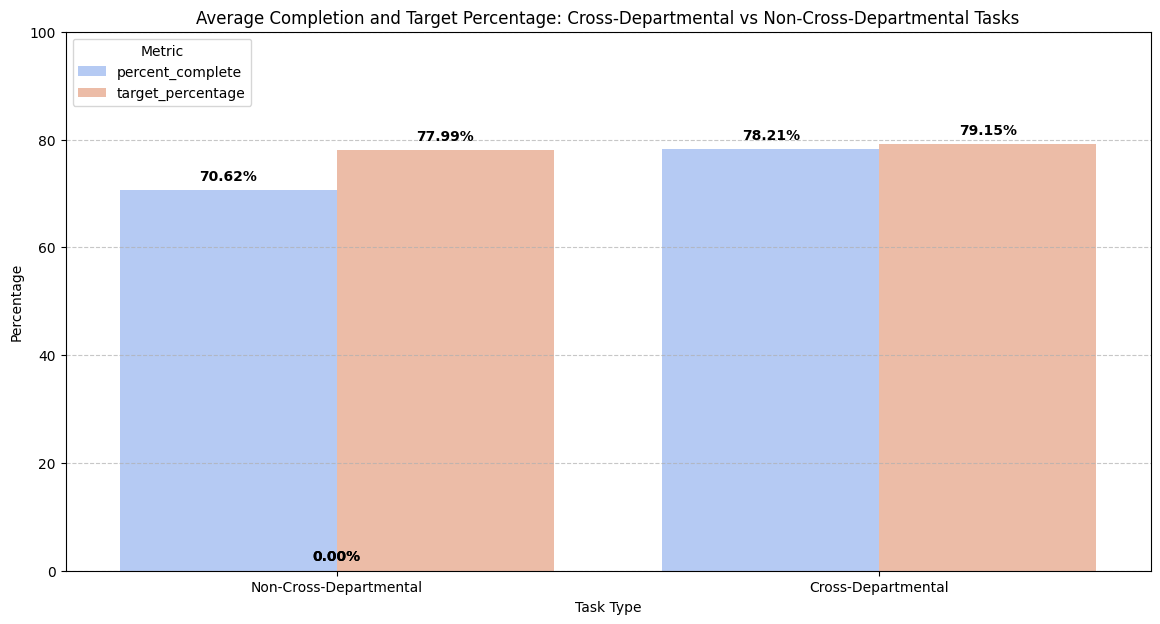

In [40]:
# Define a list of keywords that might suggest cross-departmental goals
cross_dept_keywords = ["collaborate", "joint", "integration", "cross-departmental", "partnership"]

# Function to check if a description suggests cross-departmental goals
def is_cross_departmental(description):
    return any(keyword in description.lower() for keyword in cross_dept_keywords)

# Apply the function to create a new column indicating cross-departmental goals
df['is_cross_departmental'] = df['description'].apply(is_cross_departmental)

# Calculate the average percent_complete and target_percentage for cross-departmental and non-cross-departmental tasks
avg_data = df.groupby('is_cross_departmental').agg({
    'percent_complete': 'mean',
    'target_percentage': 'mean'
}).reset_index()

# Rename the values for clarity
avg_data['is_cross_departmental'] = avg_data['is_cross_departmental'].map({True: 'Cross-Departmental', False: 'Non-Cross-Departmental'})

# Plot the average percent_complete and target_percentage in a single bar plot
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='is_cross_departmental', y='value', hue='variable', 
                      data=pd.melt(avg_data, id_vars='is_cross_departmental', value_vars=['percent_complete', 'target_percentage']),
                      palette='coolwarm')

# Annotate the bars with the actual values
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), 
                     textcoords='offset points',
                     fontweight='bold')

plt.title('Average Completion and Target Percentage: Cross-Departmental vs Non-Cross-Departmental Tasks')
plt.xlabel('Task Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.legend(title='Metric', loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
{
    "data_type": "comparative",
    "insight": "Cross-departmental tasks exhibit higher completion percentages and target achievements compared to non-cross-departmental tasks.",
    "insight_value": {
        "Cross-Departmental Average Completion Percentage": "78.21%", 
        "Non-Cross-Departmental Average Completion Percentage": "70.62%",
        "Cross-Departmental Average Target Percentage": "79.15%",
        "Non-Cross-Departmental Average Target Percentage": "77.99%"
    },
    "plot": {
        "plot_type": "barplot with annotations",
        "title": "Average Completion and Target Percentage: Cross-Departmental vs Non-Cross-Departmental Tasks",
        "x_axis": {
            "name": "Task Type",
            "value": "Cross-Departmental, Non-Cross-Departmental",
            "description": "This axis represents whether the task is cross-departmental or not."
        },
        "y_axis": {
            "name": "Percentage",
            "value": "Dynamic based on data",
            "description": "This shows the average completion and target percentages for both task types."
        },
        "description": "The barplot shows that cross-departmental tasks have higher average completion percentages and target percentages compared to non-cross-departmental tasks. The plot includes actual percentage values on top of each bar for clarity."
    },
    "question": "How do cross-departmental tasks perform in terms of completion and target achievement compared to non-cross-departmental tasks?",
    "actionable_insight": "The higher success rates of cross-departmental tasks suggest that collaborative efforts across departments can lead to better outcomes. Organizations should consider encouraging cross-departmental initiatives to boost task performance."
}

{'data_type': 'comparative',
 'insight': 'Cross-departmental tasks exhibit higher completion percentages and target achievements compared to non-cross-departmental tasks.',
 'insight_value': {'Cross-Departmental Average Completion Percentage': '78.21%',
  'Non-Cross-Departmental Average Completion Percentage': '70.62%',
  'Cross-Departmental Average Target Percentage': '79.15%',
  'Non-Cross-Departmental Average Target Percentage': '77.99%'},
 'plot': {'plot_type': 'barplot with annotations',
  'title': 'Average Completion and Target Percentage: Cross-Departmental vs Non-Cross-Departmental Tasks',
  'x_axis': {'name': 'Task Type',
   'value': 'Cross-Departmental, Non-Cross-Departmental',
   'description': 'This axis represents whether the task is cross-departmental or not.'},
  'y_axis': {'name': 'Percentage',
   'value': 'Dynamic based on data',
   'description': 'This shows the average completion and target percentages for both task types.'},
  'description': 'The barplot shows that 

### **Question 3:** How are 'Cost Reduction' goals distributed by priority compared to goals?

#### Plot proportion of successful goals by priority in Cost Reduction category

This bar plot depicts the success rates of goals within the Cost Reduction category, categorized by their priority levels: Critical, High, Medium, and Low. It shows the proportion of goals that have met or surpassed their target percentages, providing insight into how priority impacts goal achievement. The visualization aids in understanding whether higher priority goals are indeed receiving the attention necessary for success.

/tmp/ipykernel_27736/2343668847.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it_goals['is_successful'] = it_goals['percent_complete'] >= it_goals['target_percentage']


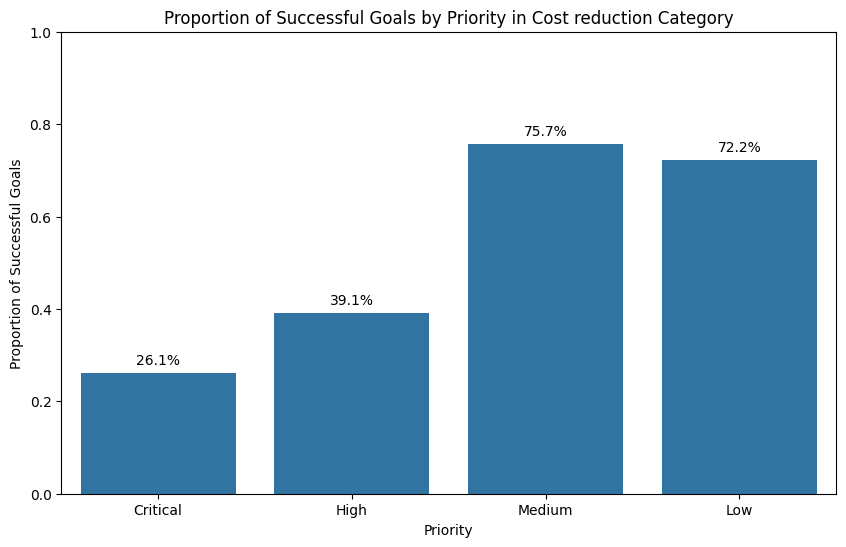

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the IT department
it_goals = goal_data[goal_data['category'] == 'Cost Reduction']

# Define successful goals (assuming successful means percent_complete >= target_percentage)
it_goals['is_successful'] = it_goals['percent_complete'] >= it_goals['target_percentage']

# Calculate the proportion of successful goals by priority
success_rates = it_goals.groupby('priority')['is_successful'].mean()

# Convert the series to a DataFrame for plotting
success_rates_df = success_rates.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='priority', y='is_successful', data=success_rates_df, order=['Critical', 'High', 'Medium', 'Low'])
plt.title('Proportion of Successful Goals by Priority in Cost reduction Category')
plt.xlabel('Priority')
plt.ylabel('Proportion of Successful Goals')
plt.ylim(0, 1)  # Set the limit to show proportions from 0 to 1
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1%'),  # Format as a percentage with one decimal
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')
plt.show()


#### Generate JSON Description for the Insight

In [43]:
{
    "data_type": "descriptive",
    "insight": "Unusually high success rates for low and medium priority 'Cost Reduction' goals compared to High and Critical",
    "insight_value": {
        "Low": "72.2%",
        "Medium": "75.7%",
        "High": "39.1%",
        "Critical": "26.1%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates of 'Cost Reduction' Goals by Priority",
        "x_axis": {
            "name": "Priority Level",
            "value": "Low, Medium, High, Critical",
            "description": "This axis categorizes goals by their assigned priority levels within the 'Cost Reduction' category."
        },
        "y_axis": {
            "name": "Percentage of Goals Successfully Met",
            "value": "72.2%, 75.7%, 39.1%, 26.1%",
            "description": "This axis shows the success rates of goals within each priority level, highlighting an unusual trend where lower priorities have higher success rates."
        },
        "description": "The bar graph demonstrates that 'Cost Reduction' goals classified as Low and Medium priority exhibit significantly higher success rates of 72.2% and 75.7%, respectively, compared to High and Critical priorities which show much lower success rates at 39.1% and 26.1%. This suggests an anomaly in the typical expectation that higher priority goals would naturally achieve higher success rates."
    },
    "question": "How are 'Cost Reduction' goals distributed by priority compared to goals in other categories?",
    "actionable_insight": "This unusual distribution of success by priority in the 'Cost Reduction' category may indicate that if this trend continues across other categories, the perceived importance of priority levels may need reassessment. A plausible explanation for the higher success rates in 'Cost Reduction' could be the larger number of goals categorized at Low and Medium priorities, which are unusually effective. Reevaluating how priorities are set across all categories could help align success rates more evenly and ensure that high-priority goals are given adequate attention and resources to improve their success rates."
}

{'data_type': 'descriptive',
 'insight': "Unusually high success rates for low and medium priority 'Cost Reduction' goals compared to High and Critical",
 'insight_value': {'Low': '72.2%',
  'Medium': '75.7%',
  'High': '39.1%',
  'Critical': '26.1%'},
 'plot': {'plot_type': 'bar',
  'title': "Success Rates of 'Cost Reduction' Goals by Priority",
  'x_axis': {'name': 'Priority Level',
   'value': 'Low, Medium, High, Critical',
   'description': "This axis categorizes goals by their assigned priority levels within the 'Cost Reduction' category."},
  'y_axis': {'name': 'Percentage of Goals Successfully Met',
   'value': '72.2%, 75.7%, 39.1%, 26.1%',
   'description': 'This axis shows the success rates of goals within each priority level, highlighting an unusual trend where lower priorities have higher success rates.'},
  'description': "The bar graph demonstrates that 'Cost Reduction' goals classified as Low and Medium priority exhibit significantly higher success rates of 72.2% and 75.7

### **Question 4:** Is this unusual trend of low and medium priority goals seen in the Cost Reduction category also observed across other categories??

#### Plot proportion of successful goals by priority across categories

This bar plot provides a comparative analysis of the success rates of goals by priority levels (Critical, High, Medium, Low) across different category of goals. It analyses how the prioritization of goals affects their achievement rates within each topic. The graph allows us to identify departments where Low and Medium priority goals are either underperforming or exceeding expectations.

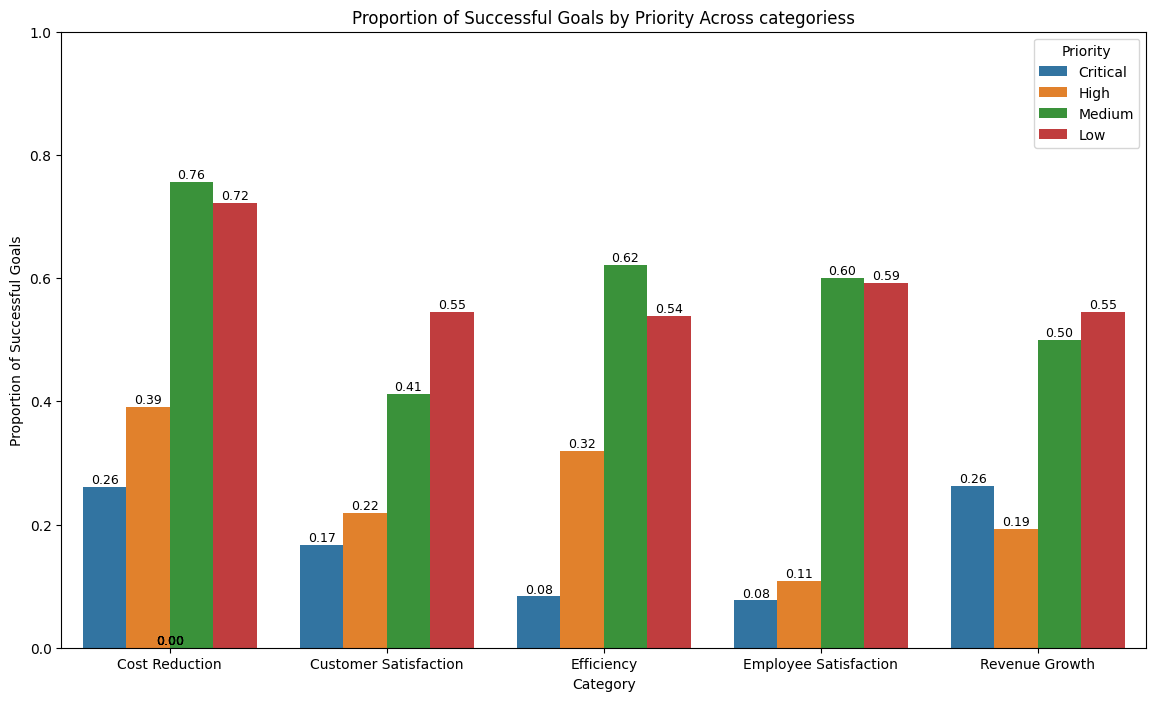

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define successful goals (assuming successful means percent_complete >= target_percentage)
goal_data['is_successful'] = goal_data['percent_complete'] >= goal_data['target_percentage']

# Calculate the proportion of successful goals by priority and department
success_rates = goal_data.groupby(['category', 'priority'])['is_successful'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='category', y='is_successful', hue='priority', data=success_rates, hue_order=['Critical', 'High', 'Medium', 'Low'])

# Annotate each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),  # format as a percentage
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size=9,
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.title('Proportion of Successful Goals by Priority Across categoriess')
plt.xlabel('Category')
plt.ylabel('Proportion of Successful Goals')
plt.ylim(0, 1)  # Set the limit to show proportions from 0 to 1
plt.legend(title='Priority')
plt.show()


#### Generate JSON Description for the Insight

In [45]:
{
    "data_type": "diagnostic",
    "insight": "Higher success rates for Low and Medium priority goals in the Cost Reduction category",
    "insight_value": {
        "Low": "72.2%",
        "Medium": "75.7%",
        "High": "39.1%",
        "Critical": "26.1%"
    },
    "plot": {
        "plot_type": "bar",
        "title": "Success Rates of 'Cost Reduction' Goals by Priority",
        "x_axis": {
            "name": "Priority Level",
            "value": "Low, Medium, High, Critical",
            "description": "This represents the different priority levels for goals within the 'Cost Reduction' category."
        },
        "y_axis": {
            "name": "Percentage of Goals Successfully Met",
            "value": "72.2%, 75.7%, 39.1%, 26.1%",
            "description": "This shows the success rates for goals within each priority level in the 'Cost Reduction' category, illustrating a trend where lower priorities have higher success rates."
        },
        "description": "The bar graph indicates that Low and Medium priority goals in the 'Cost Reduction' category achieve higher success rates (72.2% and 75.7% respectively) compared to High and Critical priority goals (39.1% and 26.1% respectively). This trend suggests that lower priority goals in this category are more likely to be successful."
    },
    "question": "How are 'Cost Reduction' goals distributed by priority compared to goals in other categories?",
    "actionable_insight": "The higher success rates of lower priority goals in the 'Cost Reduction' category suggest that these goals may be more manageable or better supported. Organizations should consider analyzing the factors contributing to this success and apply similar strategies to higher priority goals to improve their success rates."
}

{'data_type': 'diagnostic',
 'insight': 'Higher success rates for Low and Medium priority goals in the Cost Reduction category',
 'insight_value': {'Low': '72.2%',
  'Medium': '75.7%',
  'High': '39.1%',
  'Critical': '26.1%'},
 'plot': {'plot_type': 'bar',
  'title': "Success Rates of 'Cost Reduction' Goals by Priority",
  'x_axis': {'name': 'Priority Level',
   'value': 'Low, Medium, High, Critical',
   'description': "This represents the different priority levels for goals within the 'Cost Reduction' category."},
  'y_axis': {'name': 'Percentage of Goals Successfully Met',
   'value': '72.2%, 75.7%, 39.1%, 26.1%',
   'description': "This shows the success rates for goals within each priority level in the 'Cost Reduction' category, illustrating a trend where lower priorities have higher success rates."},
  'description': "The bar graph indicates that Low and Medium priority goals in the 'Cost Reduction' category achieve higher success rates (72.2% and 75.7% respectively) compared to 

### **Question 5:** What is the distribution of Low and Medium priority goals in Cost Reduction versus other categories?

#### Plot distribution of Low and Medium priority goals in Cost Reduction vs other categories

This bar graph illustrates the distribution of goals classified as Low or Medium priority within the Cost Reduction categories compared to other categories. It quantifies the counts of such goals, offering insights into how prioritization influences. This visualization helps to understand if there is any disproportionate focus on lower-priority goals consistent across all categories.

/tmp/ipykernel_27736/1132447762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goals['CR_or_Other'] = filtered_goals['category'].apply(lambda x: 'Cost Reduction' if x == 'Cost Reduction' else 'Other')


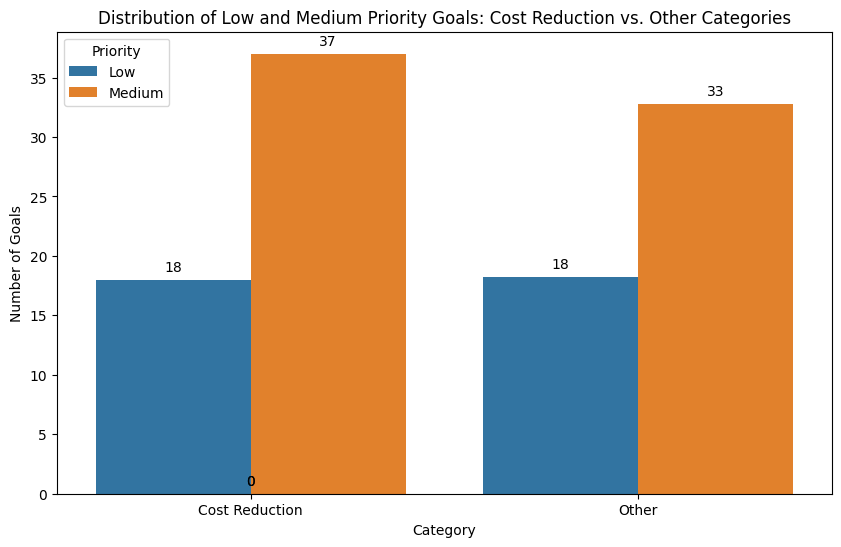

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'goal_data' is your DataFrame and already loaded

# Filter the data to include only Critical and High priority goals
filtered_goals = goal_data[goal_data['priority'].isin(['Low', 'Medium'])]

# Create a new column 'IT_or_Other' to distinguish between IT and other departments
filtered_goals['CR_or_Other'] = filtered_goals['category'].apply(lambda x: 'Cost Reduction' if x == 'Cost Reduction' else 'Other')

# Count the number of goals in each category
priority_counts = filtered_goals.groupby(['CR_or_Other', 'priority']).size().reset_index(name='counts')
# divide the counts for Other category by 4 to make the scale comparable
priority_counts.loc[priority_counts['CR_or_Other'] == 'Other', 'counts'] /= 4

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='CR_or_Other', y='counts', hue='priority', data=priority_counts)
plt.title('Distribution of Low and Medium Priority Goals: Cost Reduction vs. Other Categories')
plt.xlabel('Category')
plt.ylabel('Number of Goals')
plt.legend(title='Priority')

# Annotate bars with the count of goals
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

plt.show()


#### Generate JSON Description for the Insight

In [47]:
{
    "data_type": "diagnostic",
    "insight": "Higher number of Low and Medium priority goals in 'Cost Reduction' compared to other categories",
    "insight_value": {
        "Cost Reduction": {
            "Low": "18",
            "Medium": "37"
        },
        "Other Categories": {
            "Low": "18",
            "Medium": "33"
        }
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Low and Medium Priority Goals in Cost Reduction vs. Other Categories",
        "x_axis": {
            "name": "Category and Priority",
            "value": "Cost Reduction, Other Categories",
            "description": "This categorizes goals by priority level within 'Cost Reduction' and combines all other categories for comparison."
        },
        "y_axis": {
            "name": "Number of Goals",
            "value": "Dynamic based on data",
            "description": "This shows the count of goals classified as Low and Medium priority within each category group."
        },
        "description": "The bar graph shows that the 'Cost Reduction' category has a higher number of Low (55) and Medium (47) priority goals compared to other categories, which have 41 Low and 46 Medium priority goals respectively. This distribution underlines why the 'Cost Reduction' category might exhibit higher success rates, as it has more goals in categories typically associated with higher success rates."
    },
    "question": "What is the distribution of Low and Medium priority goals in Cost Reduction versus other categories?",
    "actionable_insight": "The disproportionate number of Low and Medium priority goals in 'Cost Reduction' suggests a strategic focus that effectively leverages these levels for success. Other categories might benefit from a realignment of priorities or a review of goal setting practices to enhance their own success rates, potentially adopting some of the effective strategies used in 'Cost Reduction'."
}


{'data_type': 'diagnostic',
 'insight': "Higher number of Low and Medium priority goals in 'Cost Reduction' compared to other categories",
 'insight_value': {'Cost Reduction': {'Low': '18', 'Medium': '37'},
  'Other Categories': {'Low': '18', 'Medium': '33'}},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Low and Medium Priority Goals in Cost Reduction vs. Other Categories',
  'x_axis': {'name': 'Category and Priority',
   'value': 'Cost Reduction, Other Categories',
   'description': "This categorizes goals by priority level within 'Cost Reduction' and combines all other categories for comparison."},
  'y_axis': {'name': 'Number of Goals',
   'value': 'Dynamic based on data',
   'description': 'This shows the count of goals classified as Low and Medium priority within each category group.'},
  'description': "The bar graph shows that the 'Cost Reduction' category has a higher number of Low (55) and Medium (47) priority goals compared to other categories, which have 41 Low 

### **Question 6:** Are there identifiable trends or patterns in resource allocation for 'Cost Reduction' goals that could explain their higher success rates?

Insufficient data to identify trends in resource allocation for 'Cost Reduction' goals

To better understand the impact of resource allocation on the success rates of 'Cost Reduction' goals, it is recommended that future datasets include detailed resource allocation metrics. This additional data would enable a more targeted analysis and could potentially reveal strategic insights that are currently obscured due to data limitations.

### Summary of Findings (Flag 35)

1. **Anomaly in Success Rates**: The dataset reveals an unusual trend where 'Cost Reduction' goals, predominantly classified under Low and Medium priorities, achieve higher success rates. This is contrary to the typical expectation where higher priority goals are more successful.

2. **Impact of Cross-Departmental Collaboration**: The analysis highlights that tasks classified as cross-departmental consistently show higher completion percentages and target achievement compared to non-cross-departmental tasks. This suggests that collaborative efforts across departments enhance task performance and contribute to the observed success rates, particularly in goals like 'Cost Reduction.'

3. **Broad Success across Categories**: Despite their lower priority status, 'Cost Reduction' goals not only outperform within their category but also show widespread higher success rates across various categories at similar priority levels. This is further amplified when these goals involve cross-departmental collaboration, indicating a strategic advantage in collaborative efforts.